In [1]:
def AUC_power(file_path):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from numpy import trapz

    #import data
    gpu_df = pd.read_csv(file_path, skiprows=1,header=None)

    #get and fix header
    header = gpu_df.loc[0]
    header = header.str[2:].str.strip()

    #remove extra header column and properly add header.
    gpu_df = gpu_df.drop(index = [0]).reset_index(drop=True)
    gpu_df= gpu_df.set_axis(header,axis=1,inplace=False)

    #fix column data types
    int_col = list(gpu_df.columns[1:-1])
    gpu_df[int_col] = gpu_df[int_col].astype('int')
    float_col = list(gpu_df.columns[-1:])
    gpu_df[float_col] = gpu_df[float_col].astype('float')
    time_col = list(gpu_df.columns[:1])[0]
    gpu_df[time_col] = pd.to_datetime(gpu_df[time_col].str.split(".").str[0],format='%Y-%m-%d:%H:%M:%S')

    #group by time and average all same time values
    gpu_df = gpu_df.groupby('time').mean()

    #calculate area and print
    area = trapz(np.array(gpu_df[gpu_df.columns[-1]]),dx=5)
    print("area =", area)

In [5]:
!pwd

/home/green/Desktop/github/mlcommons/benchmarks/earthquake/analysis


In [6]:
file_path = "gpu0.log"
AUC_power(file_path)

area = 8368659.8875


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import trapz

In [8]:
gpu_df = pd.read_csv(file_path, skiprows=1,header=None)

In [9]:
header = gpu_df.loc[0]
header = header.str[2:].str.strip()

In [10]:
gpu_df = gpu_df.drop(index = [0]).reset_index(drop=True)
gpu_df= gpu_df.set_axis(header,axis=1,inplace=False)

In [11]:
int_col = list(gpu_df.columns[1:-1])
gpu_df[int_col] = gpu_df[int_col].astype('int')

In [12]:
float_col = list(gpu_df.columns[-1:])
gpu_df[float_col] = gpu_df[float_col].astype('float')

In [13]:
time_col = list(gpu_df.columns[:1])[0]
gpu_df[time_col] = pd.to_datetime(gpu_df[time_col].str.split(".").str[0],format='%Y-%m-%d:%H:%M:%S')

In [14]:
gpu_df = gpu_df.groupby('time').mean()

<AxesSubplot:xlabel='time', ylabel='power_draw W'>

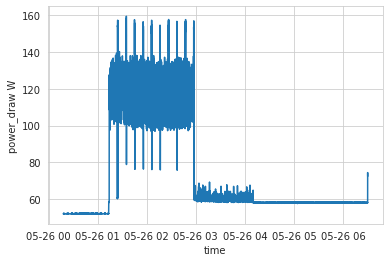

In [17]:
sns.lineplot(data=gpu_df, x=gpu_df.index.name, y=gpu_df.columns[-1])

In [16]:
%%time
area = trapz(np.array(gpu_df[gpu_df.columns[-1]]),dx=5)
print("area =", area)

area = 8368659.8875
CPU times: user 378 µs, sys: 443 µs, total: 821 µs
Wall time: 570 µs
